## Analysis of Gentoo populations are related to melting Ice Mass of Antarctica


<br />
<center>
<img src="ipynb.images/penguins.jpg" width=600 height= 400 />
</center>

### Data Breakdown

Here we collected the data of ***Gentoo penguins populations yearly*** and compared it with ***Melting Ice Mass*** over a year in Antarctica

In addition we also extracted temperature of Antarctica to visualize it agianst these features

### Mesonet Weather API to extract yearly average temperatures of Antarctica

In [3]:
import urllib
import json
import pandas as pd
import matplotlib.pyplot as plt

years=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

st='01010000'
end='12310000'
avg_temps=[]

for y in years:
        args = {
            'start':y+st,
            'end':y+end,
            'latitude':-75.2509766,
            'longitude':-0.071389,
            'obtimezone':'UTC',
            'vars':'air_temp',
            'stids':'KSEA',
            'units':'temp|C',
            'token':'b208e0ddb73c44e089612fad4843661e'
            }
        apiString = urllib.parse.urlencode(args)
        url = "http://api.mesowest.net/v2/stations/timeseries"
        fullUrl = '{}?{}'.format(url,apiString)
        response = urllib.request.urlopen(fullUrl)
        responseDict = json.loads(response.read())
        airT = responseDict['STATION'][0]['OBSERVATIONS']['air_temp_set_1']
        ksea = pd.Series(airT)
        avg_temps.append(ksea.mean())
 

Saving the API response in a data frame

In [4]:
avg_antartemps=pd.DataFrame({'Date':years,
                              'Temperature':avg_temps})
avg_antartemps=avg_antartemps.set_index(['Date'])
avg_antartemps.index=pd.to_datetime(avg_antartemps.index)
avg_antartemps

,Temperature
Date,
2001-01-01,10.135060
2002-01-01,10.261586
2003-01-01,10.993346
2004-01-01,10.986560
2005-01-01,10.880395
2006-01-01,10.918530
2007-01-01,10.282790
2008-01-01,9.752460
2009-01-01,10.272847


***Saving the dataframe to a csv file so that we no need to run the API call again and again***

In [5]:
avg_antartemps.to_csv('C:/Users/prudh/Desktop/Data Science Eng Methods and Tools/Final_Project/data_sources/antarctic_temps.csv')

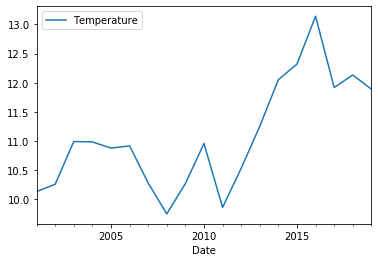

In [6]:
avg_antartemps.plot()

Extracting ***Gentoo Penguins Populations*** data from csv file

In [7]:
pen=pd.read_csv('C:/Users/prudh/Desktop/Data Science Eng Methods and Tools/Final_Project/data_sources/Gentoo Penguin nests.csv')
pen


,Time,Gentoo penguin nests
0,2000-01,85644.8
1,2001-01,76661.9
2,2002-01,87843.9
3,2003-01,88881.3
4,2004-01,94250.2
5,2005-01,100705.3
6,2006-01,96953.3
7,2007-01,101819.6
8,2008-01,106818.0
9,2009-01,121687.8


In [8]:
#Setting Month of Year as index of dataframe
pen=pen.set_index(['Time'])

#Converting the index to datetime format in pandas
pen.index=pd.to_datetime(pen.index)

In [9]:
pen

,Gentoo penguin nests
Time,
2000-01-01,85644.8
2001-01-01,76661.9
2002-01-01,87843.9
2003-01-01,88881.3
2004-01-01,94250.2
2005-01-01,100705.3
2006-01-01,96953.3
2007-01-01,101819.6
2008-01-01,106818.0


Extracting ***Yearly Antarctic Ice Mass*** data from csv file

In [10]:
ant=pd.read_csv('C:/Users/prudh/Desktop/Data Science Eng Methods and Tools/Final_Project/data_sources/Antarctic mass_yearly.csv')
ant=ant.set_index(['Time'])
ant.index=pd.to_datetime(ant.index)
ant.head(2)

,Antarctic mass(Gigatonnes)
Time,
2001-01-01,-150.65
2002-01-01,-234.45


Importing all the required libraries required for our modelling purposes

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


Scaling the data using ***MinMaxScaler*** 

In [12]:
t=avg_antartemps[:]
p=pen[:]
a=ant[:]
scaler=MinMaxScaler()
scaler.fit(t)
ant_temp=scaler.transform(t)

scaler.fit(p)
pen_count=scaler.transform(p)

scaler.fit(a)
ant_mass=scaler.transform(a)

### Plotting the Yearly Average Temperatures vs Ice Mass vs Peguin Populations

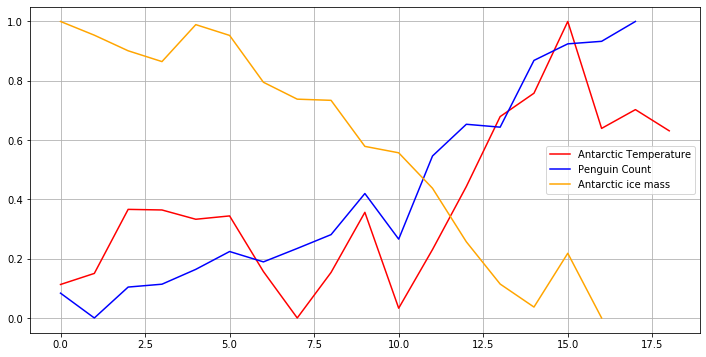

In [13]:
plt.figure(figsize=(12,6))
plt.plot(ant_temp,label='Antarctic Temperature',color='red')
plt.plot(pen_count,label='Penguin Count',color='blue')
plt.plot(ant_mass,label='Antarctic ice mass',color='orange')
plt.legend(loc='best')
plt.grid(True)

### Now we will start the modelling part using the Ice Mass and Penguin Population data

In [14]:
df=pd.concat([ant,pen],axis=1)
df=df.dropna()
df.tail(5)

,Antarctic mass(Gigatonnes),Gentoo penguin nests
Time,,
2013-01-01,-1496.190,145695.7
2014-01-01,-1754.140,169843.9
2015-01-01,-1894.718,175839.1
2016-01-01,-1566.223,176750.5
2017-01-01,-1961.400,183936.1


Checking the ***correlation*** between the two features

In [15]:
df.corr(method='pearson')

,Antarctic mass(Gigatonnes),Gentoo penguin nests
Antarctic mass(Gigatonnes),1.000000,-0.963568
Gentoo penguin nests,-0.963568,1.000000


***We can clearly see that both are hightly correlated and hence can be used for modelling further***

***Procedure:***
1. Frst we will run LSTM and ARIMA models on ice mass data and check the accuracy.
2. Then we choose the respective model to predict the ***future 5 years*** ice mass data
3. Then we use the ANN-keras to predict the future penguin populations

### Predicting future Ice Mass values using RNN-LSTM

Scaling the data using ***MinMaxScaler***

In [17]:
train, test=df[['Antarctic mass(Gigatonnes)']][:-5],df[['Antarctic mass(Gigatonnes)']][-5:]
scaler.fit(train)
train=scaler.transform(train)
test=scaler.transform(test)

Appling ***LSTM*** model

In [18]:
from keras.optimizers import Adam
n_input=4
n_features=1
generator=TimeseriesGenerator(train,train, length=n_input, batch_size=3)

model=Sequential()
model.add(LSTM(35,activation='relu',input_shape=(n_input,n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit_generator(generator, epochs=250)

Epoch 1/250
3/3 [==============================] - 2s 622ms/step - loss: 0.2640
Epoch 2/250
3/3 [==============================] - 0s 12ms/step - loss: 0.2345
Epoch 3/250
3/3 [==============================] - 0s 6ms/step - loss: 0.2123
Epoch 4/250
3/3 [==============================] - 0s 8ms/step - loss: 0.2230
Epoch 5/250
3/3 [==============================] - 0s 9ms/step - loss: 0.1978
Epoch 6/250
3/3 [==============================] - 0s 6ms/step - loss: 0.1872
Epoch 7/250
3/3 [==============================] - 0s 15ms/step - loss: 0.1490
Epoch 8/250
3/3 [==============================] - 0s 10ms/step - loss: 0.1464
Epoch 9/250
3/3 [==============================] - 0s 4ms/step - loss: 0.1602
Epoch 10/250
3/3 [==============================] - 0s 5ms/step - loss: 0.1302
Epoch 11/250
3/3 [==============================] - 0s 14ms/step - loss: 0.1198
Epoch 12/250
3/3 [==============================] - 0s 7ms/step - loss: 0.1094
Epoch 13/250
3/3 [==============================] - 0s 

3/3 [==============================] - 0s 11ms/step - loss: 0.0376
Epoch 105/250
3/3 [==============================] - 0s 8ms/step - loss: 0.0256
Epoch 106/250
3/3 [==============================] - 0s 15ms/step - loss: 0.0264
Epoch 107/250
3/3 [==============================] - 0s 8ms/step - loss: 0.0786
Epoch 108/250
3/3 [==============================] - 0s 11ms/step - loss: 0.0341
Epoch 109/250
3/3 [==============================] - 0s 4ms/step - loss: 0.0254
Epoch 110/250
3/3 [==============================] - 0s 12ms/step - loss: 0.0426
Epoch 111/250
3/3 [==============================] - 0s 12ms/step - loss: 0.0201
Epoch 112/250
3/3 [==============================] - 0s 8ms/step - loss: 0.0309
Epoch 113/250
3/3 [==============================] - 0s 6ms/step - loss: 0.0381
Epoch 114/250
3/3 [==============================] - 0s 15ms/step - loss: 0.0354
Epoch 115/250
3/3 [==============================] - 0s 11ms/step - loss: 0.0349
Epoch 116/250
3/3 [============================

3/3 [==============================] - 0s 8ms/step - loss: 0.0136
Epoch 206/250
3/3 [==============================] - 0s 7ms/step - loss: 0.0329
Epoch 207/250
3/3 [==============================] - 0s 14ms/step - loss: 0.0143
Epoch 208/250
3/3 [==============================] - 0s 7ms/step - loss: 0.0249
Epoch 209/250
3/3 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 210/250
3/3 [==============================] - 0s 14ms/step - loss: 0.0168
Epoch 211/250
3/3 [==============================] - 0s 12ms/step - loss: 0.0192
Epoch 212/250
3/3 [==============================] - 0s 12ms/step - loss: 0.0175
Epoch 213/250
3/3 [==============================] - 0s 15ms/step - loss: 0.0194
Epoch 214/250
3/3 [==============================] - 0s 13ms/step - loss: 0.0338
Epoch 215/250
3/3 [==============================] - 0s 7ms/step - loss: 0.0196
Epoch 216/250
3/3 [==============================] - 0s 8ms/step - loss: 0.0268
Epoch 217/250
3/3 [=============================

***Predicting the Ice Mass***

In [19]:
prediction=[]
batch=train[-n_input:].reshape((1,n_input,n_features))

for i in range(n_input):
    prediction.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:],[[prediction[i]]],axis=1)

In [20]:
prediction=pd.DataFrame(scaler.inverse_transform(prediction),index=df[-n_input:].index)

In [21]:
df1=pd.concat([df[['Antarctic mass(Gigatonnes)']],prediction],axis=1)
df1.tail(7)

,Antarctic mass(Gigatonnes),0
Time,,
2011-01-01,-952.680,NaN
2012-01-01,-1169.360,NaN
2013-01-01,-1496.190,NaN
2014-01-01,-1754.140,-1213.893132
2015-01-01,-1894.718,-1265.248002
2016-01-01,-1566.223,-1275.214588
2017-01-01,-1961.400,-1285.238638


***Plotting the Predicted Ice Mass and comparing it with the testing data***

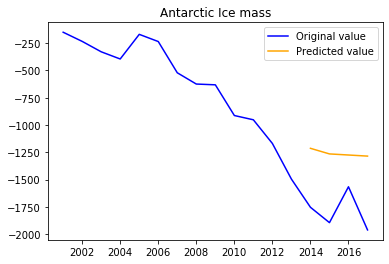

In [22]:


plt.plot(df1['Antarctic mass(Gigatonnes)'],color='blue',label='Original value')
plt.plot(df1[0],color='orange',label='Predicted value')
plt.title('Antarctic Ice mass')
plt.legend(loc='best')



We can see the LSTM model failed to get the exact prediction

Now we will give the entire dataset to get the future prediction

In [23]:
train=df1[['Antarctic mass(Gigatonnes)']]
scaler.fit(train)
train=scaler.transform(train)
model.fit_generator(generator, epochs=500)

Epoch 1/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 2/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0094
Epoch 3/500
3/3 [==============================] - 0s 6ms/step - loss: 0.0126
Epoch 4/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0131
Epoch 5/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0232
Epoch 6/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0204
Epoch 7/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0144
Epoch 8/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0151
Epoch 9/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0169
Epoch 10/500
3/3 [==============================] - 0s 6ms/step - loss: 0.0228
Epoch 11/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0116
Epoch 12/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0382
Epoch 13/500
3/3 [==============================] - 0s 14

3/3 [==============================] - 0s 15ms/step - loss: 0.0320
Epoch 105/500
3/3 [==============================] - 0s 5ms/step - loss: 0.0249
Epoch 106/500
3/3 [==============================] - 0s 5ms/step - loss: 0.0213
Epoch 107/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0196
Epoch 108/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0158
Epoch 109/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0208
Epoch 110/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0353
Epoch 111/500
3/3 [==============================] - 0s 5ms/step - loss: 0.0108
Epoch 112/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0204
Epoch 113/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0213
Epoch 114/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0239
Epoch 115/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0156
Epoch 116/500
3/3 [==============================]

Epoch 206/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0104
Epoch 207/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0322
Epoch 208/500
3/3 [==============================] - 0s 5ms/step - loss: 0.0092
Epoch 209/500
3/3 [==============================] - 0s 5ms/step - loss: 0.0125
Epoch 210/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0154
Epoch 211/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0135
Epoch 212/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0130
Epoch 213/500
3/3 [==============================] - 0s 5ms/step - loss: 0.0111
Epoch 214/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0191
Epoch 215/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0108
Epoch 216/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0255
Epoch 217/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0140
Epoch 218/500
3/3 [===============

3/3 [==============================] - 0s 7ms/step - loss: 0.0114
Epoch 308/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0176
Epoch 309/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0295
Epoch 310/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0094
Epoch 311/500
3/3 [==============================] - 0s 6ms/step - loss: 0.0179
Epoch 312/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0080
Epoch 313/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0109
Epoch 314/500
3/3 [==============================] - 0s 8ms/step - loss: 0.0110
Epoch 315/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0078
Epoch 316/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0167
Epoch 317/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0180
Epoch 318/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0232
Epoch 319/500
3/3 [============================

3/3 [==============================] - 0s 7ms/step - loss: 0.0153
Epoch 409/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0199
Epoch 410/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0202
Epoch 411/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0166
Epoch 412/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0180
Epoch 413/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0392
Epoch 414/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0355
Epoch 415/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0112
Epoch 416/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0080
Epoch 417/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0307
Epoch 418/500
3/3 [==============================] - 0s 8ms/step - loss: 0.0356
Epoch 419/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0132
Epoch 420/500
3/3 [============================

***Extrapolating into the future***

In [24]:
from pandas.tseries.offsets import DateOffset
add_dates=[df.index[-1] + DateOffset(years=x) for x in range(0,5)]
future_dates=pd.DataFrame(index=add_dates[1:],columns=df.columns)

***Predicting the futre Ice Mass***

In [26]:
prediction=[]
batch=train[-n_input:].reshape((1,n_input,n_features))

for i in range(n_input):
    prediction.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:],[[prediction[i]]],axis=1)
    
prediction=pd.DataFrame(scaler.inverse_transform(prediction),index=future_dates[-n_input:].index,columns=['Antarctic mass(Gigatonnes)'])

prediction

,Antarctic mass(Gigatonnes)
2018-01-01,-2019.740501
2019-01-01,-2018.963586
2020-01-01,-2015.587496
2021-01-01,-2024.259735


In [27]:
final_df=pd.concat([df1[['Antarctic mass(Gigatonnes)']],prediction])

In [73]:
final_df.tail(7)

,Antarctic mass(Gigatonnes),0
2015-01-01,-1894.718,NaN
2016-01-01,-1566.223,NaN
2017-01-01,-1961.400,NaN
2018-01-01,NaN,-2904.705391
2019-01-01,NaN,-3068.304660
2020-01-01,NaN,-3087.200889
2021-01-01,NaN,-4592.810794


### Plotting the future Ice mass

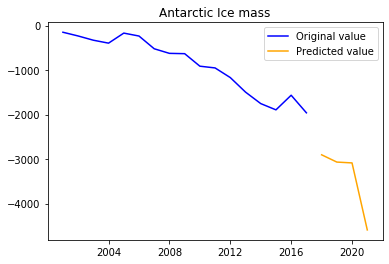

In [69]:


plt.plot(final_df['Antarctic mass(Gigatonnes)'],color='blue',label='Original value')
plt.plot(final_df[0],color='orange',label='Predicted value')
plt.title('Antarctic Ice mass')
plt.legend(loc='best')



### We can clearly see LSTM  failed to predict the future data precisely. So, we shall try with another model 

### Autoregressive integrated moving average - ARIMA

### ARIMA model for time series prediction of Ice Mass Data

In [64]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load dataset
series = ant[['Antarctic mass(Gigatonnes)']]
# seasonal difference
X = series.values
months_in_year = 12
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(1,0,0))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 4
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1

pred=[]
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	pred.append(inverted)
	    
	#print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

C:\Users\prudh\Anaconda3.7\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


Getting the future Ice Mass

In [65]:
import itertools
pred = list(itertools.chain.from_iterable(pred))
pred_df=pd.DataFrame({'Antarctic mass(Gigatonnes)':pred})
pred

[-1413.9782398508705,
 -2215.8813130145245,
 -1885.195323216621,
 -2257.3684495794896,
 -2231.531039570593]

In [66]:
pred_df

,Antarctic mass(Gigatonnes)
0,-1413.978240
1,-2215.881313
2,-1885.195323
3,-2257.368450
4,-2231.531040


***Extrapolating into the future***

In [67]:
from pandas.tseries.offsets import DateOffset
add_dates=[df.index[-1] + DateOffset(years=x) for x in range(0,6)]
future_dates=pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [70]:
pred_df=pred_df.set_index(future_dates.index)


### Future Antarctic ice mass 

In [75]:
final_df=pd.concat([ant,pred_df])
final_df.tail(7)

,Antarctic mass(Gigatonnes)
2016-01-01,-1566.223000
2017-01-01,-1961.400000
2018-01-01,-1413.978240
2019-01-01,-2215.881313
2020-01-01,-1885.195323
2021-01-01,-2257.368450
2022-01-01,-2231.531040


### Plotting the Ice Mass till 2022

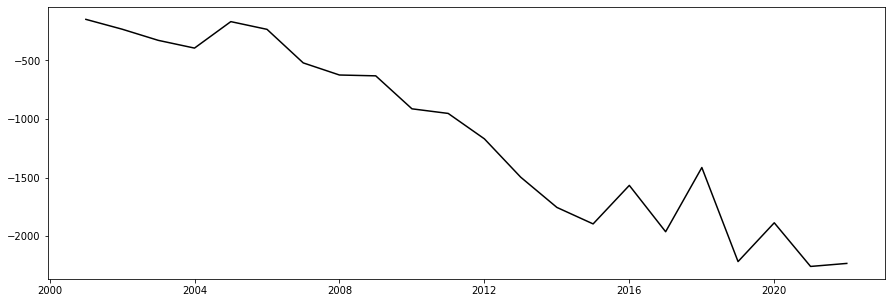

In [78]:
plt.figure(figsize=(15,5))
plt.plot(final_df,color='black')

In [218]:
ant_df=pd.concat([final_df,df[['Gentoo penguin nests']]],axis=1)

In [220]:
ant_df.tail(10)


,Antarctic mass(Gigatonnes),Gentoo penguin nests
2013-01-01,-1496.190000,145695.7
2014-01-01,-1754.140000,169843.9
2015-01-01,-1894.718000,175839.1
2016-01-01,-1566.223000,176750.5
2017-01-01,-1961.400000,183936.1
2018-01-01,-1413.978240,NaN
2019-01-01,-2215.881313,NaN
2020-01-01,-1885.195323,NaN
2021-01-01,-2257.368450,NaN
2022-01-01,-2231.531040,NaN


In [297]:
ant_df=ant_df.abs()
ant_df.tail(7)

,Antarctic mass(Gigatonnes),Gentoo penguin nests
2016-01-01,1566.223000,176750.5
2017-01-01,1961.400000,183936.1
2018-01-01,1413.978240,NaN
2019-01-01,2215.881313,NaN
2020-01-01,1885.195323,NaN
2021-01-01,2257.368450,NaN
2022-01-01,2231.531040,NaN


### Now we will predict the future Gento Penguins Population

Splitting the data into train, test data and scaling it using ***MinMaxScaler***

In [364]:
x_train,y_train,x_test,y_test=ant_df[['Antarctic mass(Gigatonnes)']][:-10],ant_df[['Gentoo penguin nests']][:-10],ant_df[['Antarctic mass(Gigatonnes)']][-10:-5],ant_df[['Gentoo penguin nests']][-10:-5]

scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
scaler.fit(y_train)
y_train=scaler.transform(y_train)
y_test=scaler.transform(y_test)

***Independent feature*** - Ice Mass  
***Dependent feature*** - Penguin Population

### Ordinary Least Square

In [366]:
import statsmodels.api as sm

In [367]:
ols_model=sm.OLS(y_train,x_train)
res=ols_model.fit()

In [368]:
y_pred=res.predict(x_test)

In [369]:
y_pred,y_test

(array([1.26366205, 1.50591544, 1.63793907, 1.32943344, 1.70056338]),
 array([[0.98508259],
        [1.32966701],
        [1.41521593],
        [1.42822121],
        [1.53075663]]))

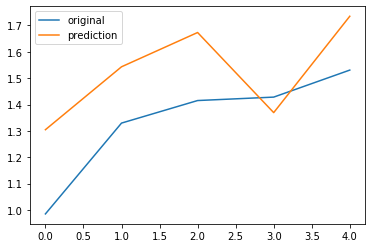

In [370]:
y_pred=model.predict(x_test)
plt.plot(y_test,label='original')
plt.plot(y_pred,label='prediction')
plt.legend(loc='best')

***We shall also try ANN's to predict penguin populations***

### ANN-keras

In [375]:
#K.clear_session()
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=6, epochs=500, verbose=1)

Epoch 1/500
12/12 [==============================] - 0s 21ms/step - loss: 0.2620
Epoch 2/500
12/12 [==============================] - 0s 249us/step - loss: 0.2495
Epoch 3/500
12/12 [==============================] - 0s 249us/step - loss: 0.2396
Epoch 4/500
12/12 [==============================] - 0s 332us/step - loss: 0.2305
Epoch 5/500
12/12 [==============================] - 0s 247us/step - loss: 0.2214
Epoch 6/500
12/12 [==============================] - 0s 330us/step - loss: 0.2137
Epoch 7/500
12/12 [==============================] - 0s 416us/step - loss: 0.2071
Epoch 8/500
12/12 [==============================] - 0s 249us/step - loss: 0.2015
Epoch 9/500
12/12 [==============================] - 0s 249us/step - loss: 0.1957
Epoch 10/500
12/12 [==============================] - 0s 249us/step - loss: 0.1897
Epoch 11/500
12/12 [==============================] - 0s 416us/step - loss: 0.1838
Epoch 12/500
12/12 [==============================] - 0s 249us/step - loss: 0.1767
Epoch 13/500
1

12/12 [==============================] - 0s 332us/step - loss: 0.0175
Epoch 197/500
12/12 [==============================] - 0s 416us/step - loss: 0.0175
Epoch 198/500
12/12 [==============================] - 0s 416us/step - loss: 0.0177
Epoch 199/500
12/12 [==============================] - 0s 332us/step - loss: 0.0175
Epoch 200/500
12/12 [==============================] - 0s 333us/step - loss: 0.0175
Epoch 201/500
12/12 [==============================] - 0s 332us/step - loss: 0.0175
Epoch 202/500
12/12 [==============================] - 0s 416us/step - loss: 0.0175
Epoch 203/500
12/12 [==============================] - 0s 333us/step - loss: 0.0174
Epoch 204/500
12/12 [==============================] - 0s 332us/step - loss: 0.0174
Epoch 205/500
12/12 [==============================] - 0s 333us/step - loss: 0.0175
Epoch 206/500
12/12 [==============================] - 0s 332us/step - loss: 0.0175
Epoch 207/500
12/12 [==============================] - 0s 416us/step - loss: 0.0175
Epoch 

12/12 [==============================] - 0s 665us/step - loss: 0.0174
Epoch 391/500
12/12 [==============================] - 0s 582us/step - loss: 0.0174
Epoch 392/500
12/12 [==============================] - 0s 665us/step - loss: 0.0174
Epoch 393/500
12/12 [==============================] - ETA: 0s - loss: 0.021 - 0s 665us/step - loss: 0.0174
Epoch 394/500
12/12 [==============================] - 0s 665us/step - loss: 0.0173
Epoch 395/500
12/12 [==============================] - 0s 748us/step - loss: 0.0173
Epoch 396/500
12/12 [==============================] - 0s 665us/step - loss: 0.0173
Epoch 397/500
12/12 [==============================] - 0s 665us/step - loss: 0.0173
Epoch 398/500
12/12 [==============================] - 0s 831us/step - loss: 0.0173
Epoch 399/500
12/12 [==============================] - 0s 831us/step - loss: 0.0173
Epoch 400/500
12/12 [==============================] - 0s 582us/step - loss: 0.0174
Epoch 401/500
12/12 [==============================] - 0s 665us/st

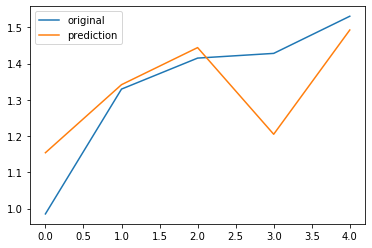

In [376]:
y_pred=model.predict(x_test)
plt.plot(y_test,label='original')
plt.plot(y_pred,label='prediction')
plt.legend(loc='best')

In [377]:
y_pred,y_test

(array([[1.1540165],
        [1.3418467],
        [1.4442106],
        [1.2050121],
        [1.4927664]], dtype=float32),
 array([[0.98508259],
        [1.32966701],
        [1.41521593],
        [1.42822121],
        [1.53075663]]))

### Now we will give all the data till 2017 and future Ice Mass data of 2018-2022 to get the Population count from 2018 to 2022

In [378]:
x_train,y_train,x_test=ant_df[['Antarctic mass(Gigatonnes)']][:-5],ant_df[['Gentoo penguin nests']][:-5],ant_df[['Antarctic mass(Gigatonnes)']][-5:]

scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
scaler.fit(y_train)
y_train=scaler.transform(y_train)
y_test=scaler.transform(y_test)

In [380]:
model.fit(x_train, y_train, batch_size=6, epochs=500, verbose=1)

Epoch 1/500
17/17 [==============================] - 0s 352us/step - loss: 0.0073
Epoch 2/500
17/17 [==============================] - 0s 293us/step - loss: 0.0072
Epoch 3/500
17/17 [==============================] - 0s 235us/step - loss: 0.0072
Epoch 4/500
17/17 [==============================] - 0s 236us/step - loss: 0.0072
Epoch 5/500
17/17 [==============================] - 0s 293us/step - loss: 0.0072
Epoch 6/500
17/17 [==============================] - 0s 235us/step - loss: 0.0072
Epoch 7/500
17/17 [==============================] - 0s 293us/step - loss: 0.0072
Epoch 8/500
17/17 [==============================] - 0s 293us/step - loss: 0.0072
Epoch 9/500
17/17 [==============================] - 0s 411us/step - loss: 0.0072
Epoch 10/500
17/17 [==============================] - 0s 293us/step - loss: 0.0072
Epoch 11/500
17/17 [==============================] - 0s 293us/step - loss: 0.0072
Epoch 12/500
17/17 [==============================] - 0s 411us/step - loss: 0.0072
Epoch 13/500


17/17 [==============================] - 0s 293us/step - loss: 0.0072
Epoch 197/500
17/17 [==============================] - 0s 294us/step - loss: 0.0073
Epoch 198/500
17/17 [==============================] - 0s 235us/step - loss: 0.0071
Epoch 199/500
17/17 [==============================] - 0s 293us/step - loss: 0.0071
Epoch 200/500
17/17 [==============================] - 0s 293us/step - loss: 0.0073
Epoch 201/500
17/17 [==============================] - 0s 235us/step - loss: 0.0074
Epoch 202/500
17/17 [==============================] - 0s 235us/step - loss: 0.0073
Epoch 203/500
17/17 [==============================] - 0s 293us/step - loss: 0.0071
Epoch 204/500
17/17 [==============================] - 0s 293us/step - loss: 0.0073
Epoch 205/500
17/17 [==============================] - 0s 235us/step - loss: 0.0073
Epoch 206/500
17/17 [==============================] - 0s 235us/step - loss: 0.0072
Epoch 207/500
17/17 [==============================] - 0s 293us/step - loss: 0.0072
Epoch 

17/17 [==============================] - 0s 293us/step - loss: 0.0071
Epoch 391/500
17/17 [==============================] - 0s 235us/step - loss: 0.0072
Epoch 392/500
17/17 [==============================] - 0s 293us/step - loss: 0.0071
Epoch 393/500
17/17 [==============================] - 0s 235us/step - loss: 0.0072
Epoch 394/500
17/17 [==============================] - 0s 293us/step - loss: 0.0071
Epoch 395/500
17/17 [==============================] - 0s 293us/step - loss: 0.0071
Epoch 396/500
17/17 [==============================] - 0s 293us/step - loss: 0.0071
Epoch 397/500
17/17 [==============================] - 0s 293us/step - loss: 0.0072
Epoch 398/500
17/17 [==============================] - 0s 293us/step - loss: 0.0073
Epoch 399/500
17/17 [==============================] - 0s 293us/step - loss: 0.0072
Epoch 400/500
17/17 [==============================] - 0s 294us/step - loss: 0.0071
Epoch 401/500
17/17 [==============================] - 0s 235us/step - loss: 0.0071
Epoch 

In [381]:
y_pred=model.predict(x_test)
y_pred=scaler.inverse_transform(y_pred)

df_pen=pd.DataFrame({'Future Gentoo Penguin Counts':y_pred.flatten()},index=ant_df[-5:].index)

In [382]:
df_pen

,Future Gentoo Penguin Counts
2018-01-01,154094.093750
2019-01-01,193832.125000
2020-01-01,177995.750000
2021-01-01,195818.937500
2022-01-01,194581.578125


### Finally these are the penguin populations of the future

***Conclusion:***
The Gentoo Peguins become more adaptable as the ice melts and can adapt strong eating habitats to the inreasing temperatures  
***Source:*** https://blogs.scientificamerican.com/observations/climate-change-meh-say-gentoo-penguins/